# The Sparks Foundation GRIP Task-1  
## Prediction Using Supervised Machine Learning

###### Author - Prabhat Kumar

###### Objective - Predict the percentage of an student based on the no. of study hours. Tell what will be the predicted score if a student studies for 9.25 Hours/Day?

In [42]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [43]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("The Data has been successfully imported")

The Data has been successfully imported


In [44]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [45]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Preprocessing

## Distribution Plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

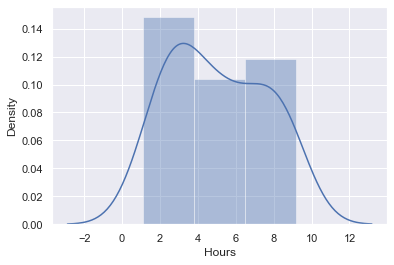

In [46]:
sns.distplot(data["Hours"])

We can conclude from the distribution plot that there contains no extreme values which are outside the range of what is expected which implies there are no major outliers in the dataset. Hence, the calculated result will likely to be significant. 

In [47]:
#checking for null values. True denotes the null values and false denotes the non null values.
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [48]:
# Checking missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Clearly, there are no missing values in our dataset.

# Visualising the data

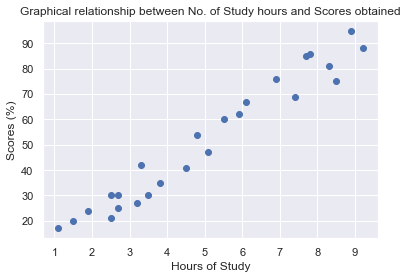

In [49]:
plt.scatter(data['Hours'],data['Scores'])
plt.title('Graphical relationship between No. of Study hours and Scores obtained')
plt.xlabel('Hours of Study')
plt.ylabel('Scores (%)')
plt.show()

The scatter plot shows that there's strong positive linear realtionship between No. of study of hours and the scores obtained. Thus, a linear functional form would be correct linear functional form for our analysis.

# Specifying the model

In [50]:
# Specifying the dependent and independent variable
y = data['Scores']
x = data['Hours']

In [51]:
# splitting the data into training and testing data
y_train, y_test, x_train, x_test = train_test_split(y,x, test_size = 0.2, random_state = 42)

# Fitting the linear regresion line
x = sm.add_constant(x_train)
linear_regression_model = sm.OLS(y_train,x).fit()

In [52]:
# Summary of linear regression
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     335.8
Date:                Sun, 13 Jun 2021   Prob (F-statistic):           4.34e-13
Time:                        00:51:44   Log-Likelihood:                -62.864
No. Observations:                  20   AIC:                             129.7
Df Residuals:                      18   BIC:                             131.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8269      2.935      0.963      0.348      -3.340       8.994
Hours          9.6821      0.528     18.324      0.000       8.572      10.792
==============================================================================
Omnibus:                        7.043   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                1.821
Skew:                          -0.134   Prob(JB):                        0.402
Kurtosis:                       1.546   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since both R squared and adjusted R squared are very high. We can conclude from the given statistics that number of hours spent on studies is highly significant at any chosen level of significance and explains approximately 95% of the variation in scores. 

# Plotting the regression line

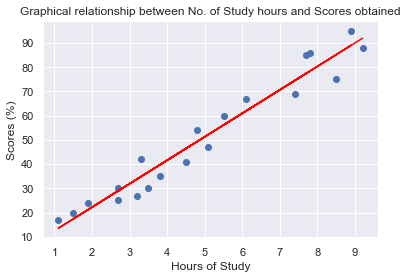

In [53]:
plt.scatter(x_train,y_train)
y_hat = x_train*9.6821 + 2.8269
plt.plot(x_train, y_hat, c = "Red")
plt.title("Graphical relationship between No. of Study hours and Scores obtained")
plt.xlabel('Hours of Study')
plt.ylabel('Scores (%)')
plt.show()

# Testing the model

In [54]:
df = pd.DataFrame({"Constant":1,"Hours of Study": x_test})
prediction = linear_regression_model.predict(df)
Results = pd.DataFrame({"Actual Score": y_test,"Predicted Score": prediction})
print("Results")
Results = Results.reset_index(drop=True)
Results


Results


,Actual Score,Predicted Score
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


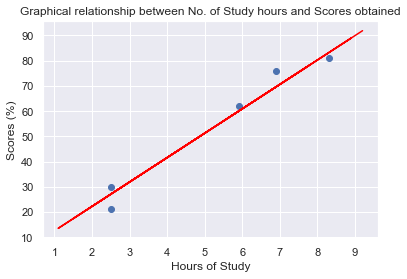

In [55]:
plt.scatter(x_test,y_test)
y_hat = x_train*9.6821 + 2.8269
plt.plot(x_train, y_hat, c = "Red")
plt.title("Graphical relationship between No. of Study hours and Scores obtained")
plt.xlabel('Hours of Study')
plt.ylabel('Scores (%)')
plt.show()

# Prediction Score for 9.25 hrs/ day study

In [56]:
z = linear_regression_model.predict([1,9.25])
df = pd.DataFrame([9.25], columns = ["Hours of Study/Day"])
df["Predicted Score"] = z
df

,Hours of Study/Day,Predicted Score
0,9.25,92.386115


# Conclusion

##### For a student studying 9.25Hrs a day , the model predicts his score as 92.67022